## Loan Approval Prediction System

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('loan_data.csv')

data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))
data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [4]:
# Replace '3+' with 3 in Dependents column
data['Dependents'] = data['Dependents'].replace('3+', 3)

In [5]:
print(data.isnull().sum())

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
data['Dependents'] = pd.to_numeric(data['Dependents'])

In [7]:
numeric_cols = ['Dependents','LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numeric_cols:
    data[col].fillna(data[col].mean(), inplace=True)


In [8]:
print(data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [9]:
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 65.94594594594595
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.52      0.52        65
           1       0.74      0.73      0.74       120

    accuracy                           0.66       185
   macro avg       0.63      0.63      0.63       185
weighted avg       0.66      0.66      0.66       185



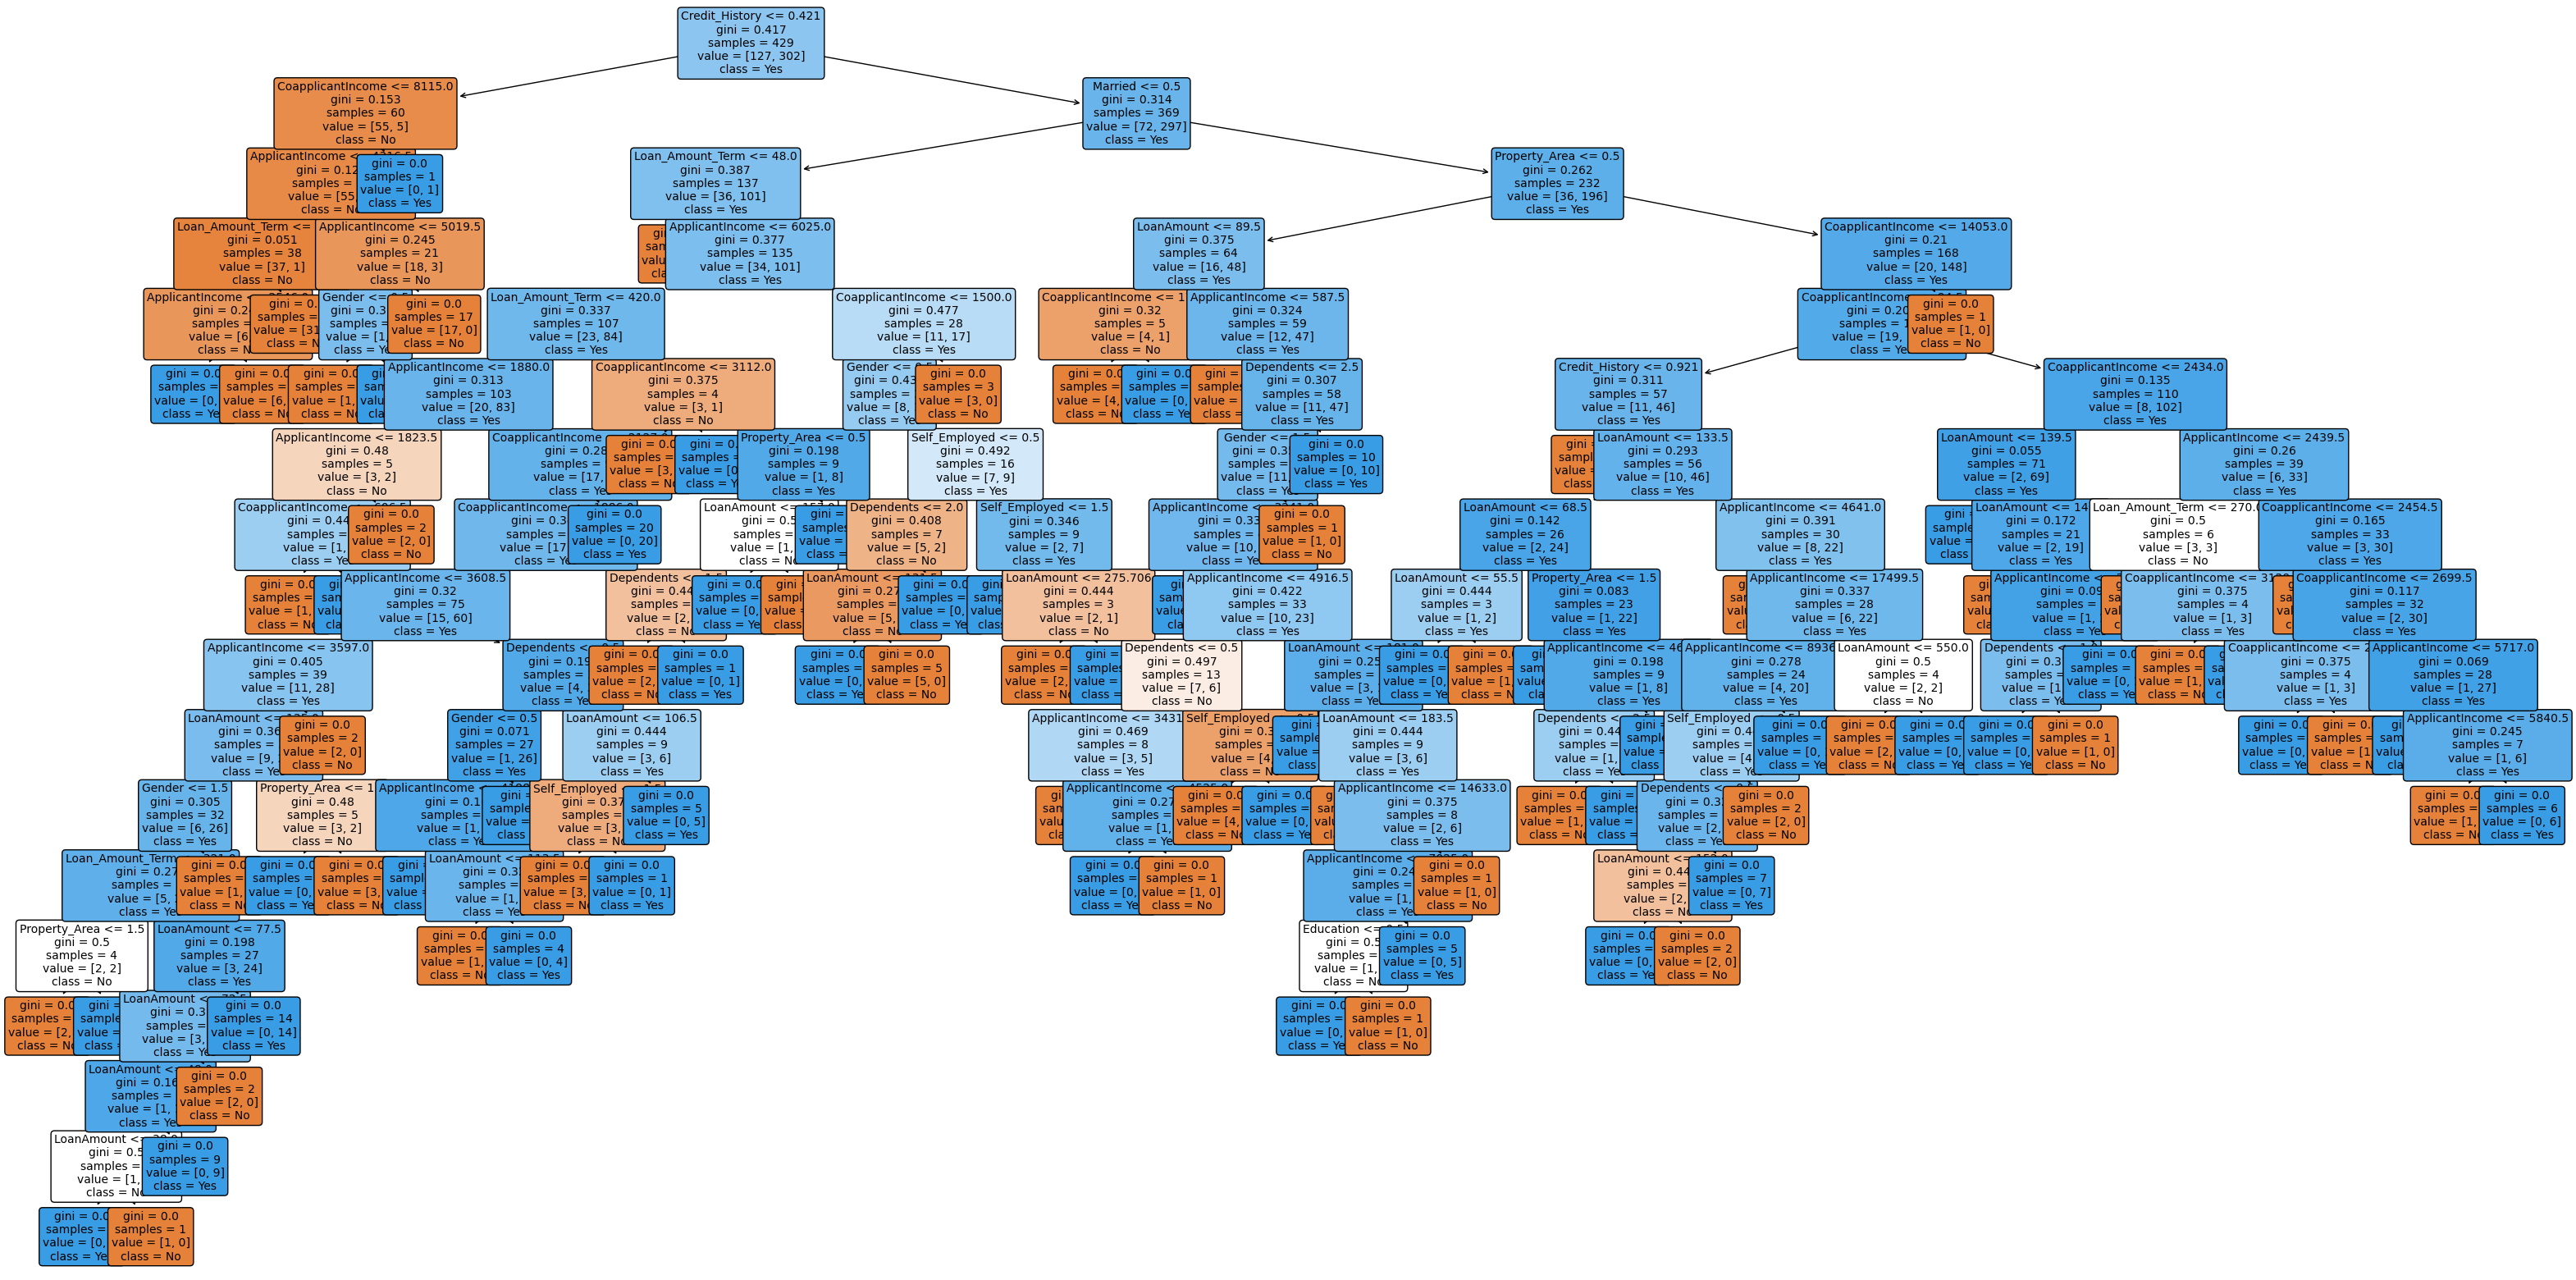

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
tree.plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'],filled=True, rounded=True,fontsize=10)
plt.show()


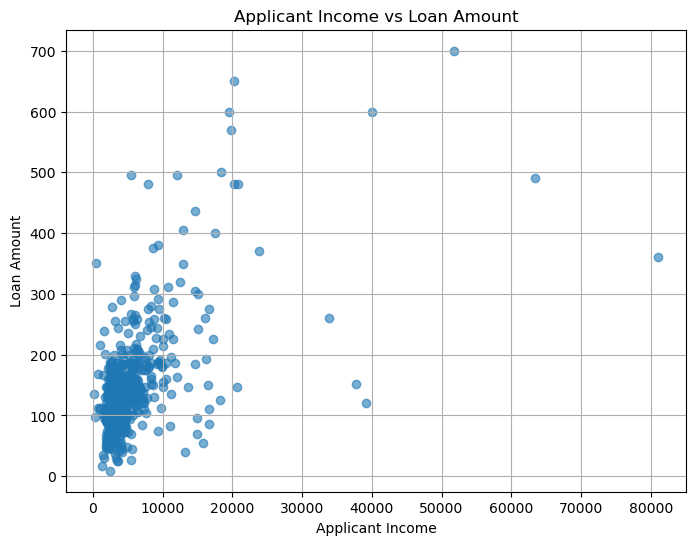

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(data['ApplicantIncome'], data['LoanAmount'], alpha=0.6)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Applicant Income vs Loan Amount')
plt.grid(True)
plt.show()


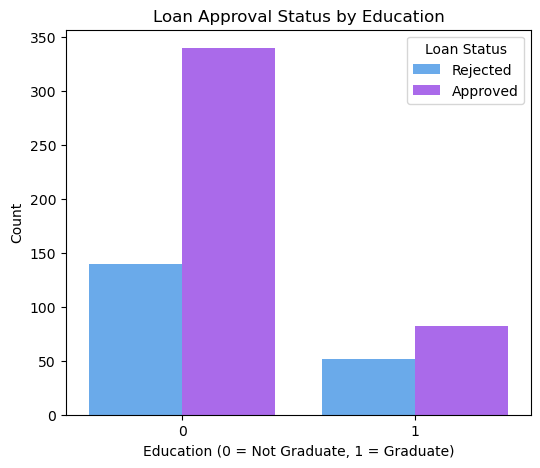

In [103]:
plt.figure(figsize=(6,5))
sns.countplot(data=data, x='Education', hue='Loan_Status', palette='cool')
plt.title('Loan Approval Status by Education')
plt.xlabel('Education (0 = Not Graduate, 1 = Graduate)')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
plt.show()

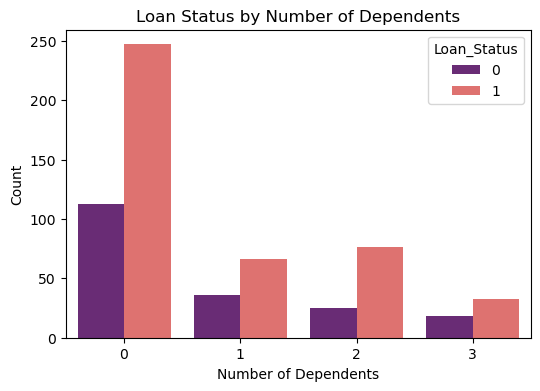

In [105]:
plt.figure(figsize=(6,4))
sns.countplot(x='Dependents', data=data, hue='Loan_Status', palette='magma')
plt.title('Loan Status by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()


# Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr)*100)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 78.37837837837837
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

